In [19]:
package designModel{
    import SI::mm;
    import ScalarValues::Real;
    import NumericalFunctions::*;
    
    import partDefinitions::*;
     
    package externalSystem{
        attribute def Budget;
        attribute def FingerSize;
        
        attribute budget:Budget;
        attribute fingerSize:FingerSize;
    }

    package partDefinitions{
        attribute def Cost :> Real;
        attribute def Characteristic {
            attribute cost:Cost;
        }
        
        part def BallAndChain{
            attribute totalCost:Cost;
        }
        
        attribute def Cut :> Characteristic;
        attribute def Color :> Characteristic;
        attribute def Carat :> Characteristic; // values from 0.5 to 3.5 in .25 increments
        attribute def Clarity :> Characteristic;
        
        port def EngagementRingPort;
        port def BandPort;

        part def Diamond{          
            attribute cut:Cut;
            attribute color:Color;
            attribute carat:Carat;
            attribute clarity:Clarity;

            attribute diamondCost:Cost;
            
            port engagementRingPort:EngagementRingPort;
            port bandPort:BandPort;
        }
        
        port def RingPort;
        port def DiamondPort;
        
        attribute def Material :> Characteristic;
         attribute def Thickness :> Characteristic;
        attribute def Size :> Characteristic; //how to represent half sizes between 3 and 14

        part def Ring{
                
            attribute material:Material;
            attribute color:Color;
            attribute thickness:Thickness;
            attribute size:Size;
 
            attribute ringCost:Cost;
            
            port ringPort:RingPort;
            port diamondPort:DiamondPort;
        }
        
        part def Band :> Ring {
            attribute bandCost :>> ringCost;
        }
        
        attribute def Nesting :> Characteristic;
        
        part def EngagementRing :> Ring{
            attribute nesting:Nesting;
            
            attribute engagementRingCost :>> ringCost;
        }        
    }

}

Package designModel (785b4afa-78fe-4a6e-89ef-ac46f6a405dc)


In [31]:
package sharedAssetSuperset {
    import designModel::*;
    import partsTree::*;
    
    package partsTree{      
        // part superset model
        abstract part ballAndChainFamily : BallAndChain{
            attribute totalCost :>> totalCost = diamond.diamondCost + band.bandCost + engagementRing.engagementRingCost;
            
            // variation point usage
            part diamond:Diamond{
                attribute :>> diamondCost = cut.cost + color.cost + carat.cost + clarity.cost;
                
                variation attribute :>> cut {
                    variant attribute cutShallow{:>> cost = 200.0;}
                    variant attribute cutIdeal{:>> cost = 250.0;}
                    variant attribute cutDeep{:>> cost = 200.0;}
                }
                variation attribute :>> color {
                    variant attribute colorColorless{:>> cost = 100.0;}
                    variant attribute colorNearColorless{:>> cost = 100.0;}
                    variant attribute colorFaint{:>> cost = 100.0;}
                    variant attribute colorVeryLight{:>> cost = 100.0;}
                    variant attribute colorLight{:>> cost = 100.0;}
                }
                variation attribute :>> carat { //To make numeric
                    variant attribute caratSmall{:>> cost = 100.0;}
                    variant attribute caratLarge{:>> cost = 200.0;}
                }
                variation attribute :>> clarity {
                    variant attribute clarityFL{:>> cost = 100.0;}
                    variant attribute clarityIF{:>> cost = 100.0;}
                    variant attribute clarityVVS{:>> cost = 100.0;}
                    variant attribute clarityVS{:>> cost = 100.0;}
                    variant attribute claritySI{:>> cost = 100.0;}
                    variant attribute clarityI{:>> cost = 100.0;}
                }
            }
            
            part band:Band{
                attribute :>> bandCost = material.cost + color.cost + thickness.cost + size.cost;
                
                variation attribute :>> material {
                    variant attribute materialGold{:>> cost = 100.0;}
                    variant attribute materialSilver{:>> cost = 100.0;}
                    variant attribute materialStainless{:>> cost = 100.0;}
                }
                variation attribute :>> color {
                    variant attribute colorYellow{:>> cost = 100.0;}
                    variant attribute colorWhite{:>> cost = 100.0;}
                    variant attribute colorSilver{:>> cost = 100.0;}
                }
                variation attribute :>> thickness { //To make numeric
                    variant attribute thicknessThin{:>> cost = 100.0;}
                    variant attribute thicknessThick{:>> cost = 100.0;}
                }
                variation attribute :>> size { //To make numeric
                    variant attribute sizeSmall{:>> cost = 100.0;}
                    variant attribute sizeLarge{:>> cost = 100.0;}
                }
            }
            
            part engagementRing:EngagementRing{
                attribute :>> engagementRingCost = material.cost + color.cost + thickness.cost + size.cost + nesting.cost;
                
                variation attribute :>> material {
                    variant attribute materialGold{:>> cost = 100.0;}
                    variant attribute materialSilver{:>> cost = 100.0;}
                    variant attribute materialStainless{:>> cost = 100.0;}
                }
                variation attribute :>> color {
                    variant attribute colorYellow{:>> cost = 100.0;}
                    variant attribute colorWhite{:>> cost = 100.0;}
                    variant attribute colorSilver{:>> cost = 100.0;}
                }
                variation attribute :>> thickness { //To make numeric
                    variant attribute thicknessThin{:>> cost = 100.0;}
                    variant attribute thicknessThick{:>> cost = 200.0;}
                }
                variation attribute :>> size { //To make numeric
                    variant attribute sizeSmall{:>> cost = 100.0;}
                    variant attribute sizeLarge{:>> cost = 200.0;}
                }
                variation attribute :>> nesting {
                    variant attribute nestingTrue{:>> cost = 100.0;}
                    variant attribute nestingFalse{:>> cost = 200.0;}
                }
            }
            
            interface engagementRingToDiamond
                connect engagementRing.diamondPort to diamond.engagementRingPort;


            variation interface engagementRingToBand{
                variant interface engagementRingToBandConnected // if nested = true
                    connect engagementRing.ringPort to band.ringPort; 

                variant interface engagementRingToBandDisconnected //else
                    connect diamond.bandPort to band.diamondPort;
            }
            
            assert constraint engagementRingToBandConstraint {
                engagementRing.nesting == engagementRing.nesting::nestingTrue and 
                    engagementRingToBand == engagementRingToBand::engagementRingToBandConnected xor
                engagementRing.nesting == engagementRing.nesting::nestingFalse and 
                    engagementRingToBand == engagementRingToBand::engagementRingToBandDisconnected
            }
           
        }
    }  
}

Package sharedAssetSuperset (ef05efdc-ca93-4a36-98e9-e9c694b185a8)


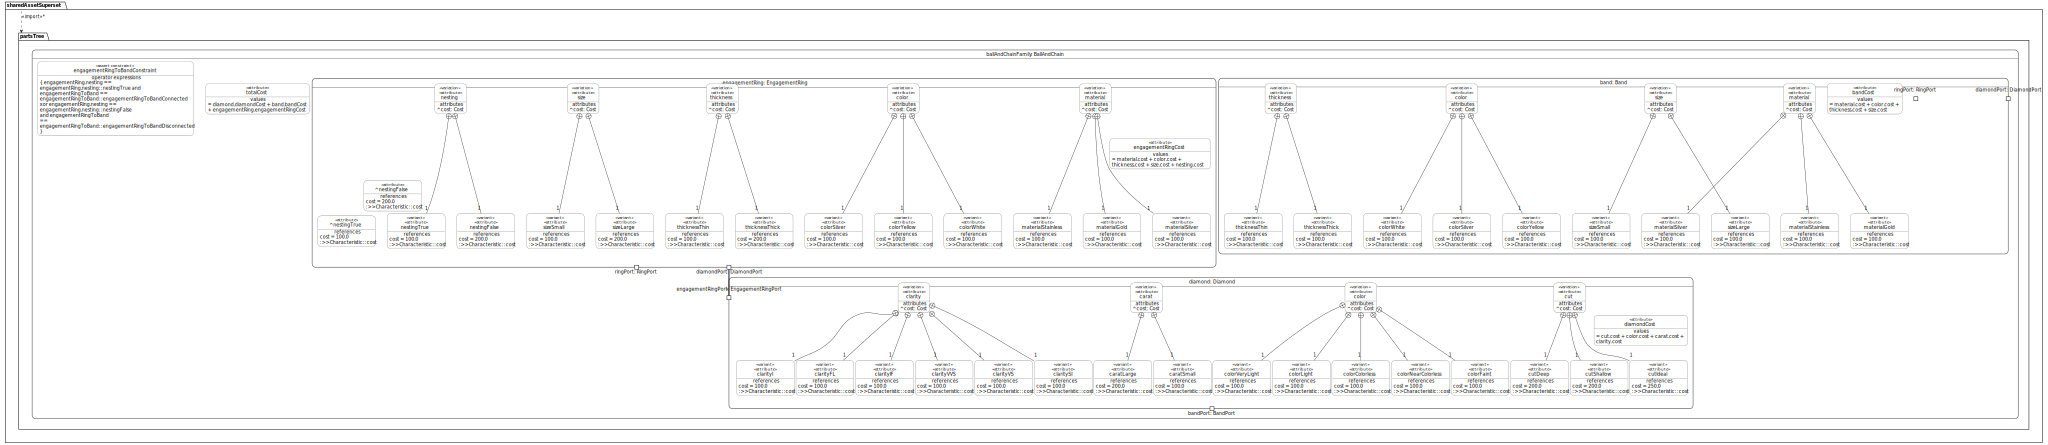

In [32]:
%viz sharedAssetSuperset --view interconnection

In [46]:
package productAssetInstance {
    import sharedAssetSuperset::*;
    
    part newBallAndChain :>partsTree::ballAndChainFamily{
        part :>> diamond{
            attribute :>> cut = cut::cutIdeal;
            attribute :>> color = color::colorColorless;
            attribute :>> carat = carat::caratSmall;
            attribute :>> clarity = clarity::clarityVVS;          
        }
        
        part :>> band{
            attribute :>> material = material::materialGold;
            attribute :>> color = color::colorYellow;
            attribute :>> thickness = thickness::thicknessThin;
            attribute :>> size = size::sizeSmall;
        }
        
        part :>> engagementRing{
            attribute :>> material = material::materialGold;
            attribute :>> color = color::colorYellow;
            attribute :>> thickness = thickness::thicknessThin;
            attribute :>> size = size::sizeSmall;
            attribute :>> nesting = nesting::nestingTrue;
        }
        
        // NOTE: Have to use "ref" because interface declarations can't currently have feature values.
        ref :>> engagementRingToBand = engagementRingToBand::engagementRingToBandConnected;
    }
}

Package productAssetInstance (2d1f99d0-06a8-4732-8ae5-7dba92248328)


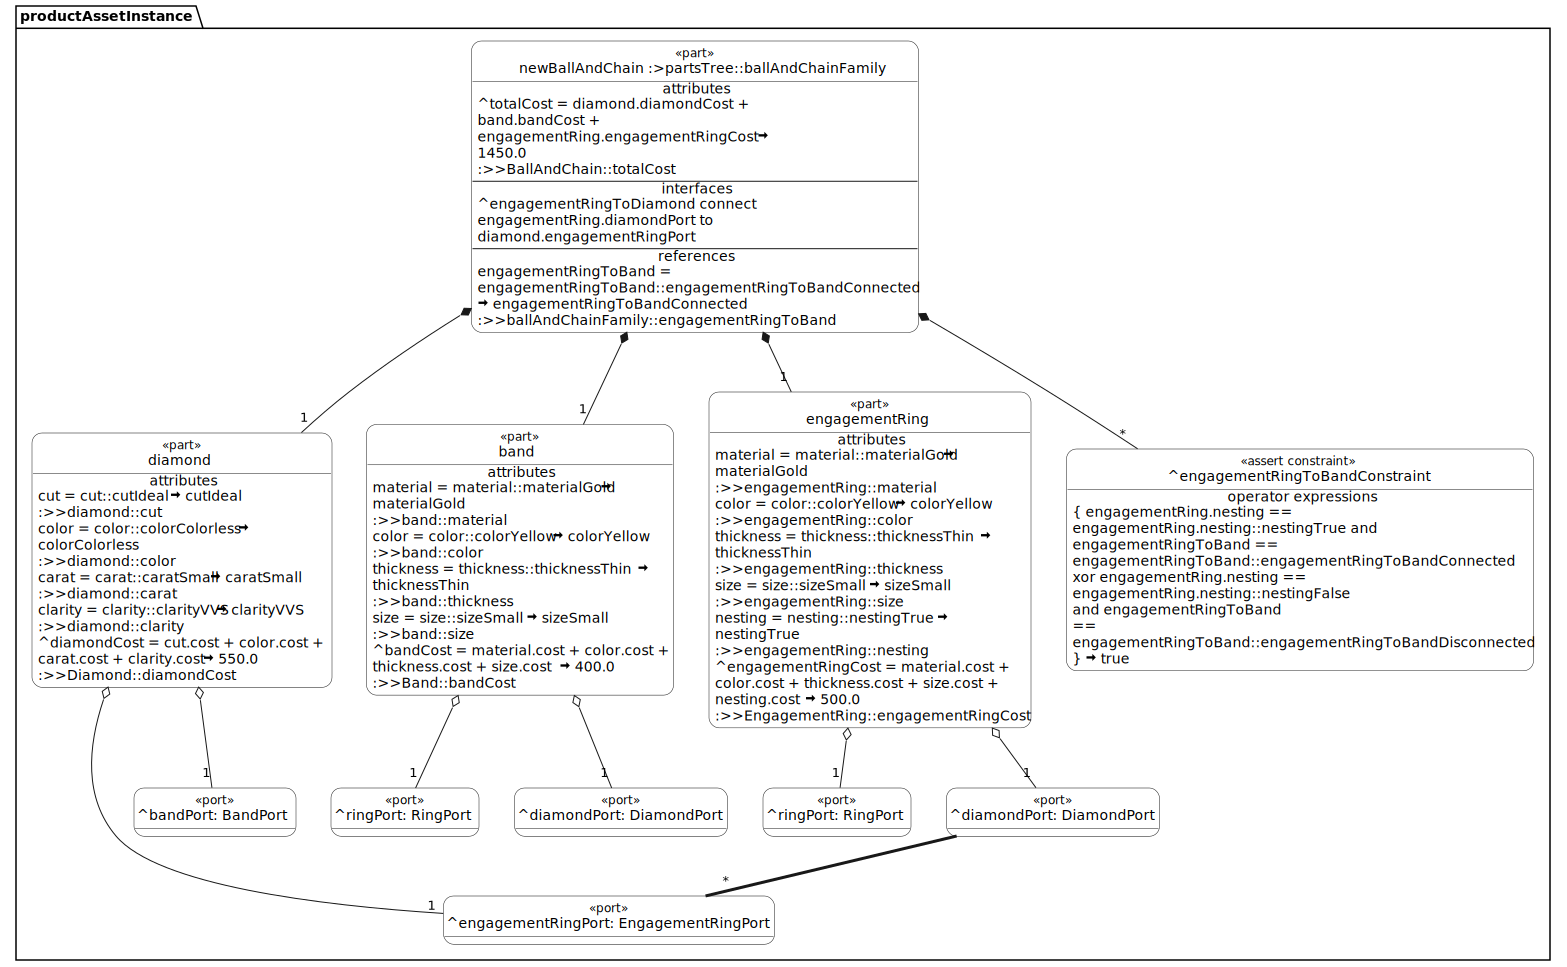

In [47]:
%viz --view=tree --style=showinherited --style=eval productAssetInstance

In [48]:
%eval productAssetInstance::newBallAndChain.engagementRingToBandConstraint()

LiteralBoolean true (8321546b-3c95-462c-a1a9-125888e724d0)


In [49]:
// constraints
    package constraints{
        import productAssetInstance::*;
        import SequenceFunctions::includes;
        
        assert constraint sizingConstraint{
            doc /*the rings must be the same size*/
            newBallAndChain.engagementRing.size == newBallAndChain.band.size
        }
        assert constraint materialConstraint{
            doc /*to prevent galvanic corrosion*/
            newBallAndChain.engagementRing.material == newBallAndChain.band.material
        }
        assert constraint thicknessConstraint{
            doc /*sizing constraint*/
            (newBallAndChain->includes(ballAndChainFamily.engagementRing.thickness.thicknessThin)) xor
                (newBallAndChain->includes(ballAndChainFamily.diamond.carat.caratLarge))
        }
        assert constraint availabilityConstraint{
            doc /*to simulate availability*/
            (newBallAndChain->includes(ballAndChainFamily.diamond.carat.caratLarge)) xor 
                (newBallAndChain->includes(ballAndChainFamily.diamond.color.colorColorless))
        }
    }

Package constraints (d3469f82-97b0-409c-80a6-5a4fab446d7b)


In [50]:
    //requirements
    package specification{
        import productAssetInstance::*;
        
        requirement budgetReq{
            subject budget : Cost = 100.0;
            
            attribute :> budget = 100.00; //dollar unit?
            assume constraint{newBallAndChain.totalCost <= budget}
        }

        requirement fingerReq{ //numerical definition of size TBD
            subject fingerSize;
            attribute sizeSmall;
            
            attribute :> fingerSize = sizeSmall;
            assume constraint{newBallAndChain.engagementRing.size == fingerSize}
            assume constraint{newBallAndChain.band.size == fingerSize}
        }
    }

Package specification (0bff2d42-6108-43f3-b61c-6909a37f0900)


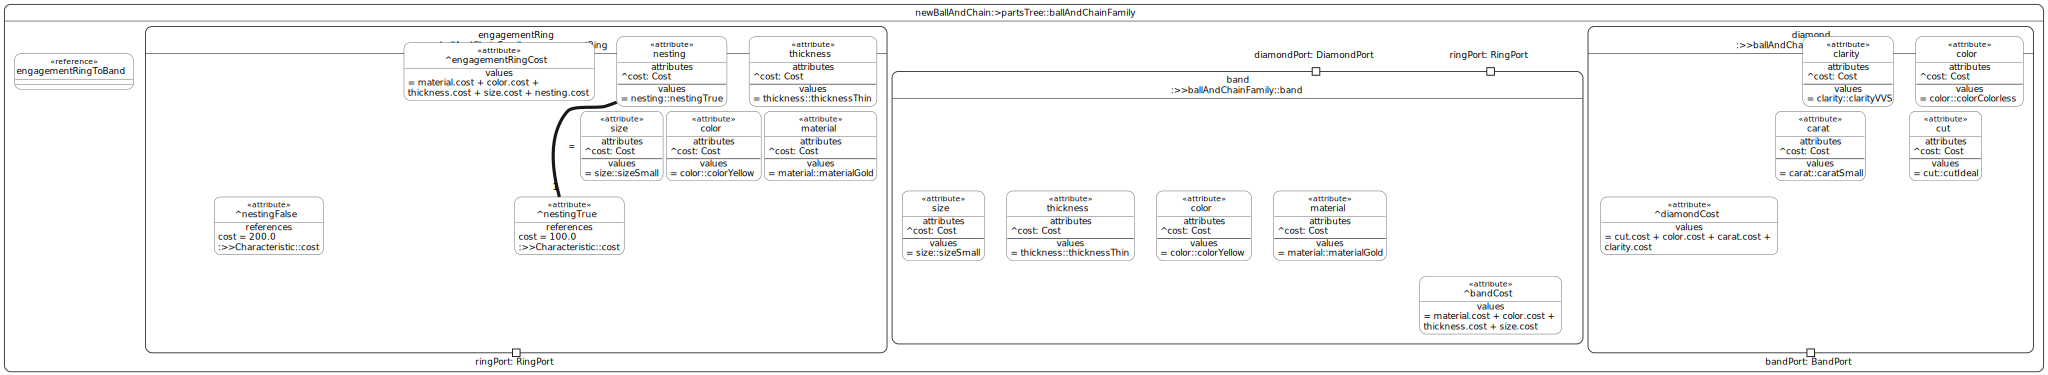

In [51]:
//visualize instance architecture
%viz productAssetInstance::newBallAndChain --view interconnection

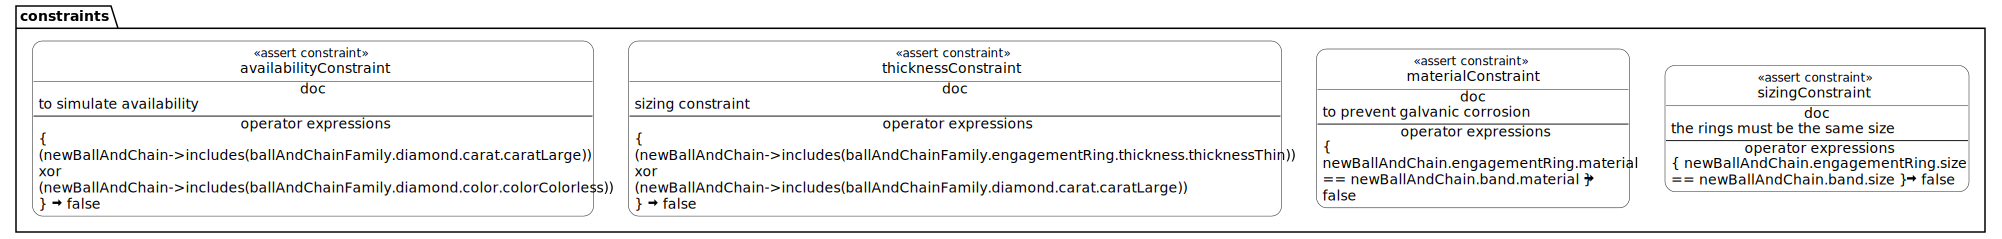

In [52]:
//evaluate constraints
%viz constraints --style eval

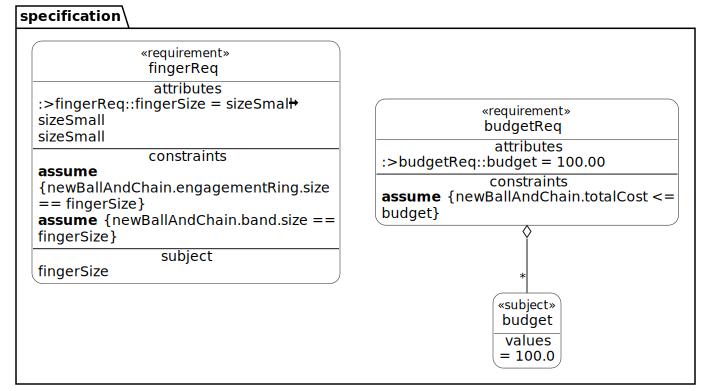

In [53]:
//evaluate compliance to specification
%viz specification --style eval

## States

In [54]:
//TBD
//engagementRing: boxed ->yes/no -> worn/returned
//when worn, then it can exhibit its repelling behavior
//when paired with wedding band, then its repelling behavor increases